### Get Stock Price Predictor

[*********************100%***********************]  1 of 1 completed
         Open        High         Low       Close   Adj Close    Volume
0  211.471466  218.053055  209.319321  217.832840  217.832840  26216158
1  222.172165  224.704712  220.095093  222.842850  222.842850  30542227
2  223.223221  226.001007  220.970978  225.845840  225.845840  21594983
3  228.663666  235.485489  226.846848  233.063065  233.063065  35478286
4  233.438431  236.936935  230.700699  233.683685  233.683685  25558216


Open   --- mean : 595.1854611670892   	 Std:  404.659344519683   	 Max:  1820.5400390625   	 Min:  131.38638305664062
High   --- mean : 600.8108673338227   	 Std:  408.7066359298637   	 Max:  1843.8299560546875   	 Min:  134.81982421875
Low    --- mean : 589.2461429843523   	 Std:  400.8042003921636   	 Max:  1817.0   	 Min:  123.77377319335938
Close  --- mean : 595.1791107662782   	 Std:  404.9480276583226   	 Max:  1824.969970703125   	 Min:  128.84884643554688
Volume --- mean : 5555460.540

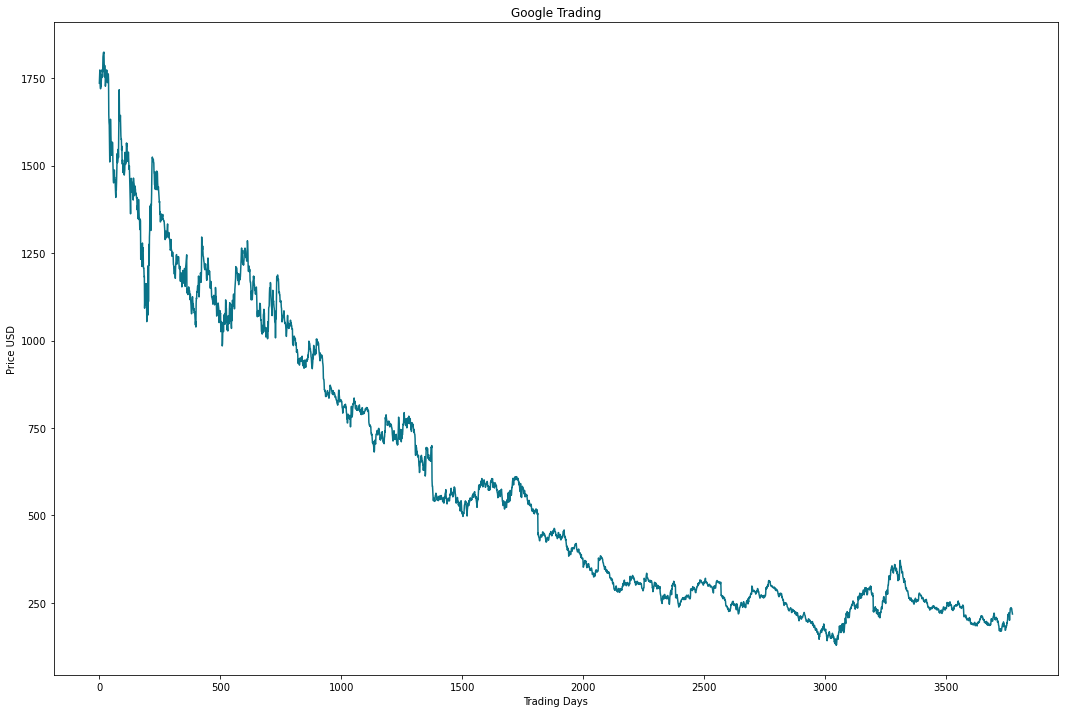

3750
    Item      Open     Close    Volume         High          Low  PCT_CHANGE  \
52    52  0.901144  0.898070  0.012739  1571.400024  1541.130005   -0.007801   
53    53  0.920338  0.903087  0.013942  1583.849976  1545.900024    0.005124   
54    54  0.921875  0.905372  0.017555  1585.160034  1558.630005    0.002322   
55    55  0.896999  0.903811  0.027522  1588.420044  1529.300049   -0.001583   
56    56  0.868213  0.869729  0.013815  1511.849976  1487.000000   -0.034603   

           MACD       SMA       EMA         TR        ATR           MA  \
52  1576.877023 -0.006325 -0.002012  20.049927  45.730487  1572.379993   
53  1574.189591 -0.002728  0.000367  30.270020  45.893488  1577.643982   
54  1572.765656  0.002139  0.001019  37.949951  46.798987  1574.462976   
55  1571.130512  0.004547  0.000152  26.530029  45.962488  1572.492969   
56  1558.994363 -0.007308 -0.011433  59.119995  45.951489  1560.239966   

          BB_UP      BB_DOWN    BB_RANGE        RSI        ADX  
52  

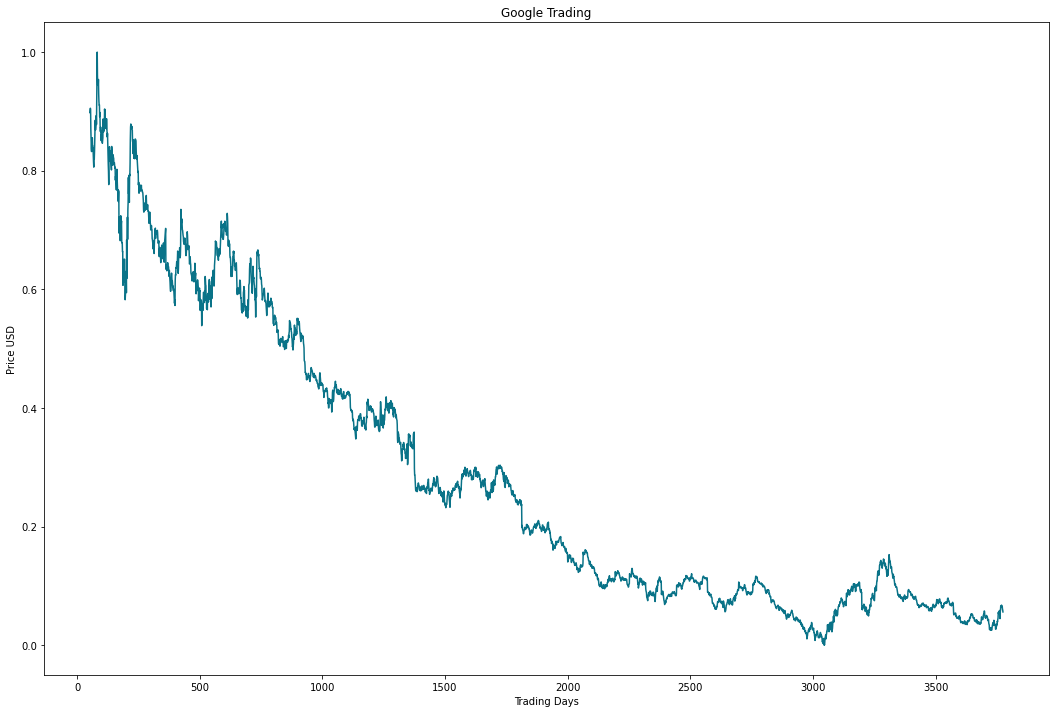

,Item,Open,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,52,0.901144,0.898070,0.012739,-0.007801,-0.006325,-0.002012,20.049927,45.730487,146.182554,39.421468,21.006457
1,53,0.920338,0.903087,0.013942,0.005124,-0.002728,0.000367,30.270020,45.893488,123.826640,40.746484,21.185233
2,54,0.921875,0.905372,0.017555,0.002322,0.002139,0.001019,37.949951,46.798987,99.338856,41.375435,21.311811
3,55,0.896999,0.903811,0.027522,-0.001583,0.004547,0.000152,26.530029,45.962488,77.301478,41.054814,21.964644
4,56,0.868213,0.869729,0.013815,-0.034603,-0.007308,-0.011433,59.119995,45.951489,58.931736,34.728002,23.222866


x_train (2551, 1)
y_train (2551, 1)
x_test (1172, 1)
y_test (1172, 1)


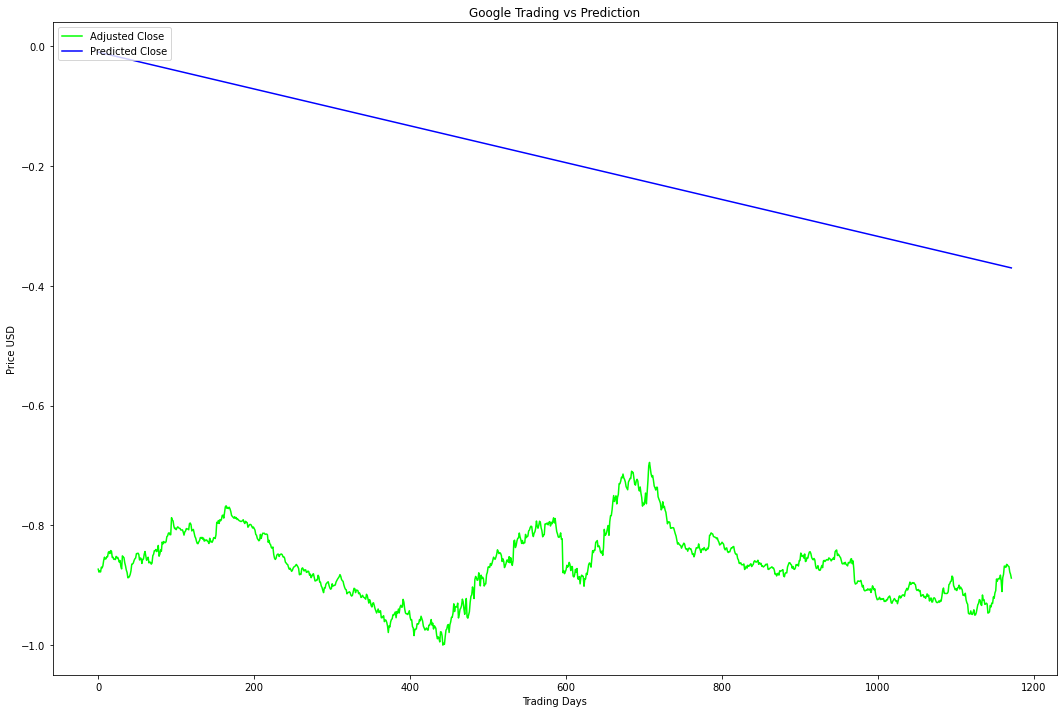

Train Score: 0.7381 MSE (0.8591 RMSE)
Test Score: 0.46781628 MSE (0.68397097 RMSE)


,Open,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,0.901144,0.898070,0.012739,-0.007801,-0.006325,-0.002012,20.049927,45.730487,146.182554,39.421468,21.006457
1,0.920338,0.903087,0.013942,0.005124,-0.002728,0.000367,30.270020,45.893488,123.826640,40.746484,21.185233
2,0.921875,0.905372,0.017555,0.002322,0.002139,0.001019,37.949951,46.798987,99.338856,41.375435,21.311811
3,0.896999,0.903811,0.027522,-0.001583,0.004547,0.000152,26.530029,45.962488,77.301478,41.054814,21.964644
4,0.868213,0.869729,0.013815,-0.034603,-0.007308,-0.011433,59.119995,45.951489,58.931736,34.728002,23.222866


x_train (3217, 11)
y_train (3217,)
x_test (496, 11)
y_test (496,)
x_train (3167, 50, 11)
y_train (3167,)
x_test (446, 50, 11)
y_test (446,)
compilation time :  0.003204822540283203
94/94 [==============================] - 8s 51ms/step - loss: 0.0279 - val_loss: 0.0197


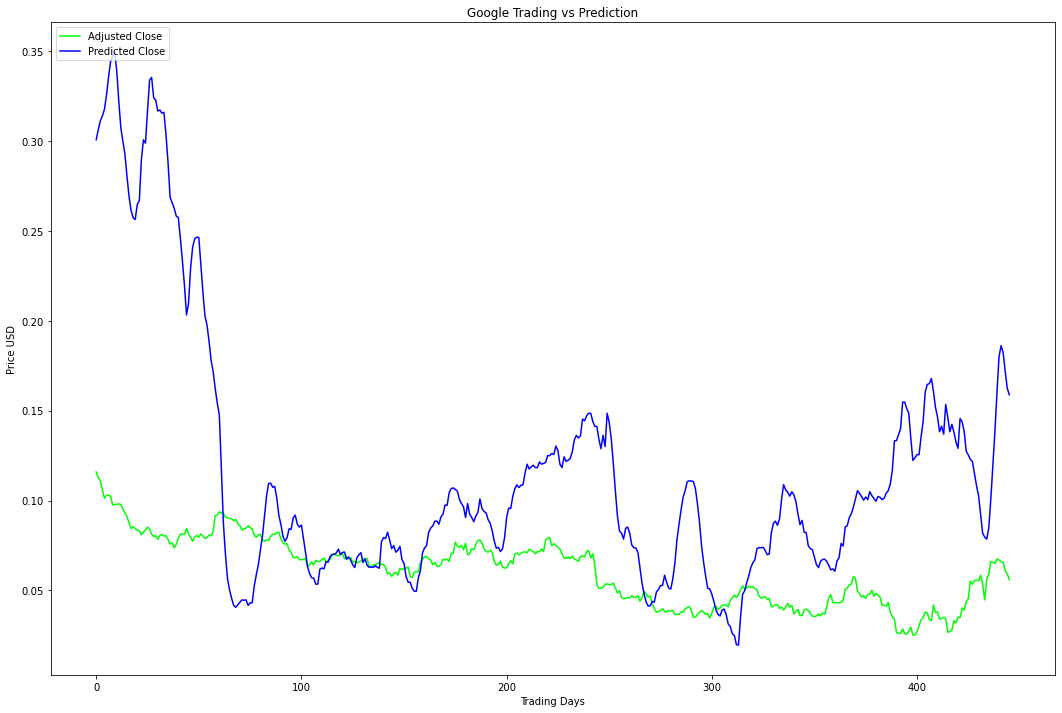

Train Score: 0.00611302 MSE (0.07818579 RMSE)
Test Score: 0.00728939 MSE (0.08537791 RMSE)
compilation time :  0.0025742053985595703
Epoch 1/100
27/27 - 9s - loss: 0.0401 - val_loss: 0.0285
Epoch 2/100
27/27 - 2s - loss: 0.0157 - val_loss: 0.0214
Epoch 3/100
27/27 - 2s - loss: 0.0113 - val_loss: 0.0235
Epoch 4/100
27/27 - 2s - loss: 0.0100 - val_loss: 0.0149
Epoch 5/100
27/27 - 2s - loss: 0.0082 - val_loss: 0.0265
Epoch 6/100
27/27 - 2s - loss: 0.0071 - val_loss: 0.0190
Epoch 7/100
27/27 - 2s - loss: 0.0064 - val_loss: 0.0206
Epoch 8/100
27/27 - 2s - loss: 0.0055 - val_loss: 0.0172
Epoch 9/100
27/27 - 2s - loss: 0.0051 - val_loss: 0.0228
Epoch 10/100
27/27 - 2s - loss: 0.0047 - val_loss: 0.0190
Epoch 11/100
27/27 - 2s - loss: 0.0043 - val_loss: 0.0177
Epoch 12/100
27/27 - 2s - loss: 0.0037 - val_loss: 0.0186
Epoch 13/100
27/27 - 2s - loss: 0.0038 - val_loss: 0.0196
Epoch 14/100
27/27 - 2s - loss: 0.0038 - val_loss: 0.0169
Epoch 15/100
27/27 - 2s - loss: 0.0033 - val_loss: 0.0223
Epoch 

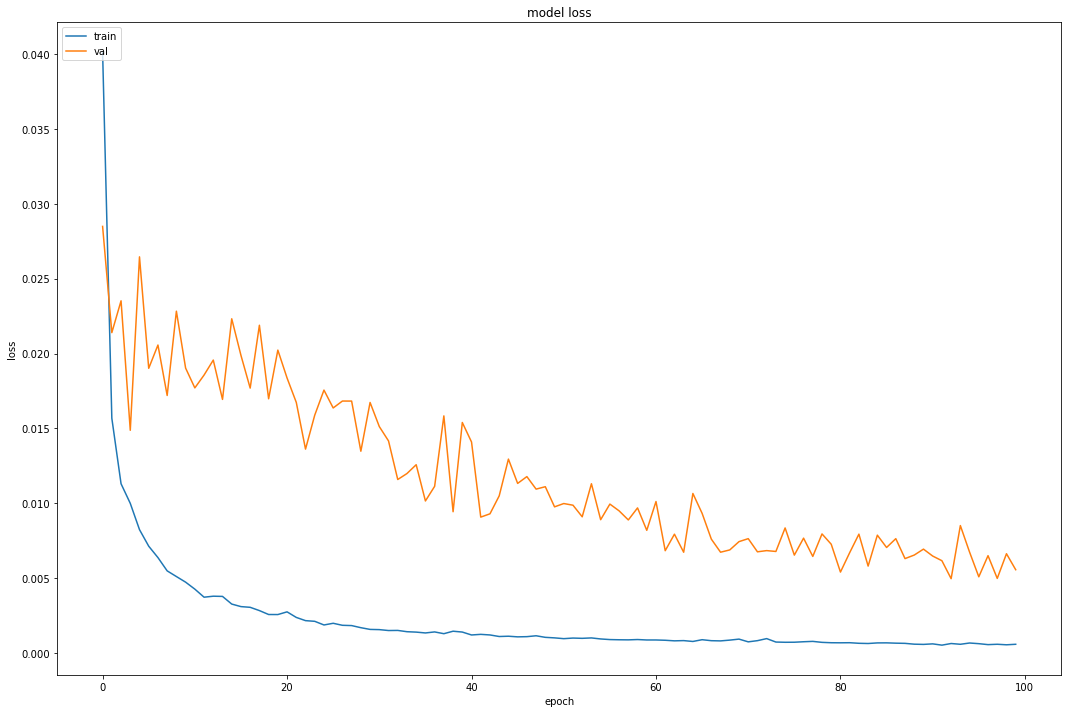

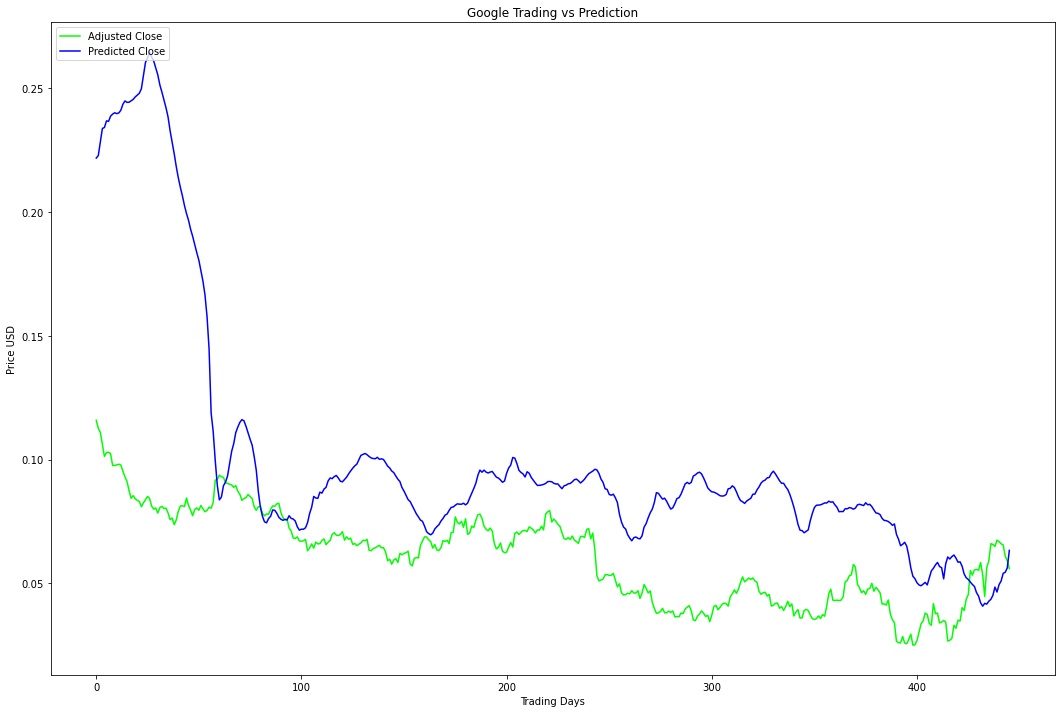

Train Score: 0.00100652 MSE (0.03172564 RMSE)
Test Score: 0.00336300 MSE (0.05799137 RMSE)
Delta Price: 0.003363 - RMSE * Adjusted Close Range
INFO:tensorflow:Assets written to: model/assets
[*********************100%***********************]  1 of 1 completed
78
        Open     Close    Volume  PCT_CHANGE       SMA       EMA         TR  \
52  0.897431  0.912240  0.163641    0.000802  0.004220  0.005870  54.880005   
53  0.845876  0.837822  0.090985   -0.014132  0.002436 -0.000798  54.389893   
54  0.922999  0.826603  0.187953   -0.002161  0.002371 -0.001252  27.199951   
55  0.878365  0.954313  0.110429    0.024654  0.007856  0.007383  45.190063   
56  0.886168  0.791706  0.102799   -0.030635 -0.004295 -0.005290  54.820068   

          ATR    BB_RANGE        RSI        ADX  
52  38.716992  197.084886  38.137127  62.074414  
53  39.865991  162.549523  34.112057  59.800664  
54  40.204993  125.139147  33.537369  56.908721  
55  41.011005   89.231076  44.913881  53.213208  
56  41.91651

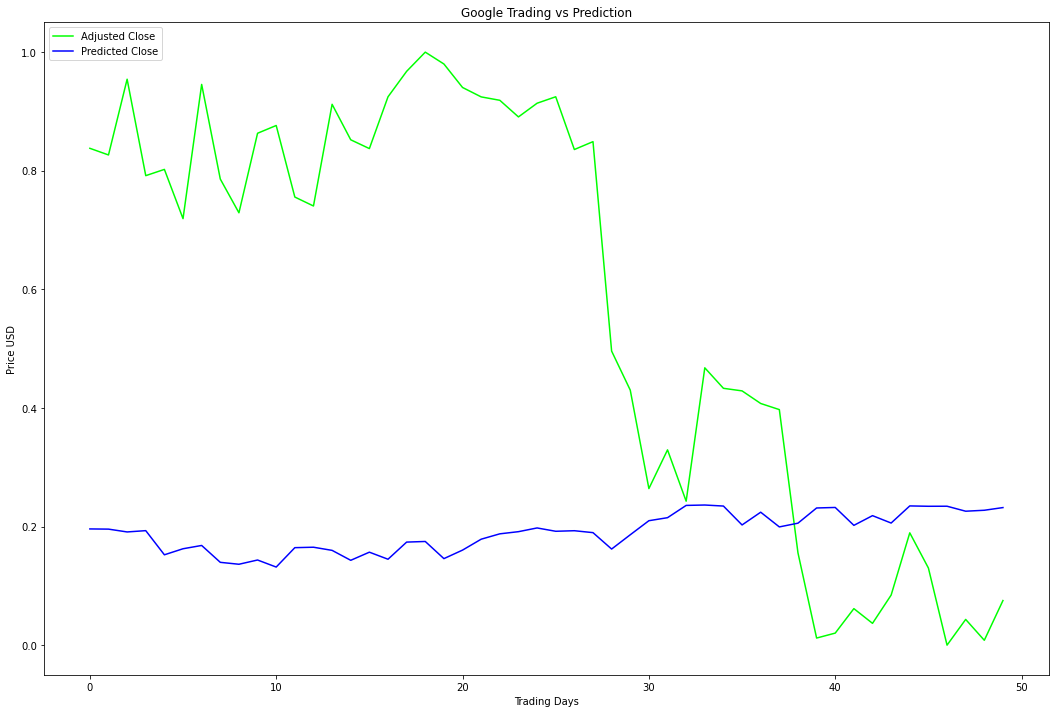

In [192]:
from ipynb.fs.full.Stock_Price_Predictor import *

### Imports

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

In [157]:
data = pd.read_csv('googl.csv')
stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

In [158]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2588, 17)
y_train (2588,)
x_test (496, 17)
y_test (496,)
x_train (2538, 50, 17)
y_train (2538,)
x_test (446, 50, 17)
y_test (446,)


In [159]:
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
model.compile(loss='mean_squared_error', optimizer='adam')


In [160]:
model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_split=0.05)

Epoch 1/10
76/76 [==============================] - 11s 77ms/step - loss: 0.0959 - val_loss: 0.0029
Epoch 2/10
76/76 [==============================] - 4s 53ms/step - loss: 0.0149 - val_loss: 0.0023
Epoch 3/10
76/76 [==============================] - 4s 53ms/step - loss: 0.0118 - val_loss: 8.0608e-04
Epoch 4/10
76/76 [==============================] - 4s 54ms/step - loss: 0.0102 - val_loss: 0.0015
Epoch 5/10
76/76 [==============================] - 4s 54ms/step - loss: 0.0078 - val_loss: 0.0031
Epoch 6/10
76/76 [==============================] - 4s 55ms/step - loss: 0.0070 - val_loss: 0.0010
Epoch 7/10
76/76 [==============================] - 4s 55ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 8/10
76/76 [==============================] - 4s 55ms/step - loss: 0.0066 - val_loss: 5.9450e-04
Epoch 9/10
76/76 [==============================] - 4s 55ms/step - loss: 0.0057 - val_loss: 0.0048
Epoch 10/10
76/76 [==============================] - 4s 56ms/step - loss: 0.0065 - val_loss: 0.0031


In [182]:
predictions = model.predict(X_test)
print(predictions.shape)

(446, 1)


In [162]:
#change array into dataframe for strategy
df = pd.DataFrame(predictions, columns = ['predicted_price_normalized'])
df.head()

,predicted_price_normalized
0,0.249913
1,0.246589
2,0.243734
3,0.241243
4,0.239070


In [163]:
data = pd.read_csv('google.csv')
min_p = np.min(data['Close'])
max_p = np.max(data['Close'])
print(max_p)
print(min_p)
denormalized_p = df['predicted_price_normalized'] * (max_p - min_p) + min_p
denormalized_p #denormalized predicted_price

1004.280029296875
87.58258056640625


0      316.676758
1      313.630341
2      311.013062
3      308.729248
4      306.737854
          ...    
441    280.012665
442    280.093201
443    280.120728
444    280.534882
445    280.939697
Name: predicted_price_normalized, Length: 446, dtype: float32

In [164]:
denorm_pred_prices = denormalized_p.to_frame()
denorm_pred_prices.tail()

,predicted_price_normalized
441,280.012665
442,280.093201
443,280.120728
444,280.534882
445,280.939697


## Strategy: Leverage to amplify returns, stop levels to limit losses.
## Want to study how different 1) stop levels, 2) leverage levels affect ROI.


In [165]:
# for higher leverages,'higher' the stop loss level. If 1% leverage, 5% stop loss,
# then if we double leverage: 2% leverage, 2.5% stop loss. To limit downside.

In [183]:
# join the dataframes
data.head()
combined = data.join(denorm_pred_prices).dropna() #we only have 446 rows of predictions,
#so drop the NaN values for the days we did not predict.

In [185]:
combined['Day Range'] = combined['High'] - combined['Low']
combined['Confidence %'] = (combined['predicted_price_normalized'] - combined['Open'])/combined['Open']*100
combined.head()

,Open,High,Low,Close,Adj Close,Volume,predicted_price_normalized,Day Range,Confidence %
0,99.714714,100.040039,96.376373,96.491493,96.491493,15321663,316.676758,3.663666,217.582777
1,98.798798,101.921921,97.827827,101.456459,101.456459,31656712,313.630341,4.094093,217.443479
2,100.800804,101.566566,96.836838,97.347343,97.347343,27484288,311.013062,4.729729,208.542242
3,96.821823,98.548546,96.211212,96.851852,96.851852,16456727,308.729248,2.337334,218.863287
4,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,306.737854,4.094093,214.159449


In [168]:
def compute_leverage_stop_toAssign(conf_lvl, baseLeverage = 5, stop = 3, take_prof = 7):
    if (conf_lvl < 0): #negative confidence, no trade
        return 0, 0, 0 #leverage: 0, stop: 0
    elif (conf_lvl > 0 and conf_lvl < 30): # OK confidence
        return baseLeverage, stop, take_prof
    elif (conf_lvl >= 30 and conf_lvl <= 80): # GOOD confidence
        pct_lev = conf_lvl/(abs(100 - conf_lvl)/100)/10 # % of leverage to take
        pct_stop = stop * baseLeverage/pct_lev
        return pct_lev, pct_stop, take_prof
    elif (conf_lvl <= 200): # VERY GOOD confidence, not expecting confidence above 200%
        pct_lev = conf_lvl/(abs(100 - conf_lvl)/100) # % of leverage to take
        pct_stop = stop * baseLeverage/pct_lev
        return pct_lev, pct_stop, take_prof
    else:
        return -1, -1, -1

In [187]:
compute_leverage_stop_toAssign(103, 5)

(3433.3333333333335, 0.004368932038834952, 7)

## We want to make trades with  good RR ratio

In [170]:
#leverage is based on capital
combined.head()

,Open,High,Low,Close,Adj Close,Volume,predicted_price_normalized,Day Range,Confidence %
0,99.714714,100.040039,96.376373,96.491493,96.491493,15321663,316.676758,3.663666,217.582777
1,98.798798,101.921921,97.827827,101.456459,101.456459,31656712,313.630341,4.094093,217.443479
2,100.800804,101.566566,96.836838,97.347343,97.347343,27484288,311.013062,4.729729,208.542242
3,96.821823,98.548546,96.211212,96.851852,96.851852,16456727,308.729248,2.337334,218.863287
4,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,306.737854,4.094093,214.159449


In [379]:
combined['x'] = combined['Confidence %'].apply(compute_leverage_stop_toAssign)
combined[['Leverage Pct', 'Stop Loss', 'Take Profit']] = combined['x'].apply(pd.Series)
combined.tail()
combined.head(15)

,Open,High,Low,Close,Adj Close,Volume,predicted_price_normalized,Day Range,Confidence %,x,Leverage Pct,Stop Loss,Take Profit
0,99.714714,100.040039,96.376373,96.491493,96.491493,15321663,316.676758,3.663666,217.582777,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
1,98.798798,101.921921,97.827827,101.456459,101.456459,31656712,313.630341,4.094093,217.443479,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
2,100.800804,101.566566,96.836838,97.347343,97.347343,27484288,311.013062,4.729729,208.542242,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
3,96.821823,98.548546,96.211212,96.851852,96.851852,16456727,308.729248,2.337334,218.863287,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
4,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,306.737854,4.094093,214.159449,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
5,95.415413,97.222221,94.484482,97.022018,97.022018,19306474,304.979492,2.737740,219.633362,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
6,97.347343,99.149147,96.011009,97.627625,97.627625,15064121,303.399658,3.138138,211.667116,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
7,97.907906,98.953957,96.686684,96.866867,96.866867,13903483,302.006378,2.267273,208.459645,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
8,97.262260,98.063065,95.345345,97.787788,97.787788,16339244,300.762756,2.717720,209.228631,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
9,97.787788,98.793793,97.122124,97.762764,97.762764,13685101,299.637695,1.671669,206.416272,"(-1, -1, -1)",-1.000000,-1.000000,-1.0


## Trade scope: Weekly (buy/sell within each week)

In [388]:
# combined['T+' + str(1)] = combined['Confidence %'].shift(1)
# combined['T+' + str(2)] = combined['Confidence %'].shift(2)
# combined['T+' + str(3)] = combined['Confidence %'].shift(3)
# combined['T+' + str(4)] = combined['Confidence %'].shift(4)
# combined['T+' + str(5)] = combined['Confidence %'].shift(5)
# combined['T+' + str(6)] = combined['Confidence %'].shift(6)
# combined['T+' + str(7)] = combined['Confidence %'].shift(7)
combined.head(15)

,Open,High,Low,Close,Adj Close,Volume,predicted_price_normalized,Day Range,Confidence %,x,Leverage Pct,Stop Loss,Take Profit
0,99.714714,100.040039,96.376373,96.491493,96.491493,15321663,316.676758,3.663666,217.582777,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
1,98.798798,101.921921,97.827827,101.456459,101.456459,31656712,313.630341,4.094093,217.443479,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
2,100.800804,101.566566,96.836838,97.347343,97.347343,27484288,311.013062,4.729729,208.542242,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
3,96.821823,98.548546,96.211212,96.851852,96.851852,16456727,308.729248,2.337334,218.863287,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
4,97.637634,98.048050,93.953957,94.369370,94.369370,20753426,306.737854,4.094093,214.159449,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
5,95.415413,97.222221,94.484482,97.022018,97.022018,19306474,304.979492,2.737740,219.633362,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
6,97.347343,99.149147,96.011009,97.627625,97.627625,15064121,303.399658,3.138138,211.667116,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
7,97.907906,98.953957,96.686684,96.866867,96.866867,13903483,302.006378,2.267273,208.459645,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
8,97.262260,98.063065,95.345345,97.787788,97.787788,16339244,300.762756,2.717720,209.228631,"(-1, -1, -1)",-1.000000,-1.000000,-1.0
9,97.787788,98.793793,97.122124,97.762764,97.762764,13685101,299.637695,1.671669,206.416272,"(-1, -1, -1)",-1.000000,-1.000000,-1.0


In [222]:
# combined.drop('T+1', 1, inplace = True)
# combined.drop('T+2', 1, inplace = True)
# combined.drop('T+3', 1, inplace = True)
# combined.drop('T+4', 1, inplace = True)
# combined.drop('T+5', 1, inplace = True)
# combined.drop('T+6', 1, inplace = True)
# combined.drop('T+7', 1, inplace = True)

In [224]:
# Want to shift 'x', want to maintain an entry price. 
# Compute 'leveraged position', 'stop loss price', and 'take profit price' upon trade

In [395]:
def enterTrade(price, leverage_pct, stop_loss, take_profit):
    entry_price = price
    if (capital <= 0):
        print("No more capital. End.")
    leveraged_position = (1 + (leverage_pct/100)) * capital
    trade_size = leveraged_position/price
    stop_loss_price = (1 - (stop_loss/100)) * entry_price
    take_profit_price = (1 + (take_profit/100))* entry_price
    print(entry_price)
    print(stop_loss_price)
    print(take_profit_price)
    print("entered trade")
    return True, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price
    
def exitTrade(entryPrice, exitPrice, trade_size, capital):
    #compute gains/losses and start fresh
    print('exiting trade')
    returns = (exitPrice - entryPrice) * trade_size
    print('Entry Price: ' + str(entryPrice))
    print('Exit Price: ' + str(exitPrice))
    print('Leveraged_Position: ' + str(leveraged_position))
    print("Gained/Lost: " + str(returns))
    capital += returns
#     in_trade = False
#     entry_price = 0
#     leveraged_position = 0
#     stop_loss_price = 0
#     take_profit_price = 0
    return False, 0, 0, 0, 0, 0, capital

In [396]:
capital = 1000
in_trade = False
entry_price = 0
trade_size = 0
leveraged_position = 0 #amount in $ involved in trade
stop_loss_price = 0
take_profit_price = 0

for i, row in combined.iterrows():
    if (in_trade == False): # check for opportunity to make a trade
        if (row['Confidence %'] > 100 and row['Confidence %'] < 200):
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price = enterTrade(row['Open'], row['Leverage Pct'], row['Stop Loss'], row['Take Profit'])
            print("take profit at: " + str(take_profit_price))
            print("stop loss at: " + str(stop_loss_price))
        else:
            print('no trade, confidence too extreme or low')
    else:
        print('In a trade, looking to sell')
        if (take_profit_price > row['High']):
            # our target not met, check for need to cut loss.
            if (stop_loss_price > row['Low']):
                # exit trade, limit loss.
                in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, stop_loss_price, trade_size, capital)
                print("Bad trade, capital left: " + str(capital))
            else:
                print('no trade')
                # no trade for the day
        else:
            # target met, sell it.
            in_trade, entry_price, trade_size, leveraged_position, stop_loss_price, take_profit_price, capital = exitTrade(entry_price, take_profit_price, trade_size, capital)
            print("Good trade, capital left: " + str(capital))
            


no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
100.58558654785156
100.51168998337596
107.62657760620118
entered trade
take profit at: 107.62657760620118
stop loss at: 100.51168998337596
In a trade, looking to sell
exiting trade
Entry Price: 100.58558654785156
Exit Price: 100.51168998337596
Leveraged_Position: 3041.7509378477716
Gained/Lost: -2.2346635538130832
Bad trade, capital left: 997.7653364461869
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
no trade, confidence too extreme or low
n

In [394]:
print(capital)

54325.88144345372


In [393]:
(1 - (3/100)) * 99.71471405029295


96.72327262878416